# Task 1 - Exploratory Data Analysis

## Importing Libraries

In [1]:
!pip install pandas numpy plotly matplotlib seaborn --quiet

In [2]:
import os
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Setting configuration for visualization and dataframe 
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

## Downloading and Loading the Dataset

In [4]:
# Creating a central data directory
data_path = 'data'
if os.path.exists(data_path):
    print('[INFO] Data directory exists.')
else:
    print('[INF0] Creating data directory.')
    os.mkdir(data_path)

[INF0] Creating data directory.


In [5]:
data_url = 'https://cdn.theforage.com/vinternships/companyassets/e6nrxEAa6MHFh3Jmw/DCGoJxzfdJHirTYGe/1652216241761/sample_sales_data.csv'
sales_data_path = os.path.join(data_path, 'sample_sales_data.csv')
if os.path.exists(sales_data_path):
    print('[INFO] sample_sales_data.csv already exist.')
else:
    print(f'[INFO] Downloading the sales data file to {sales_data_path}.')
    urlretrieve(data_url, sales_data_path)

[INFO] Downloading the sales data file to data/sample_sales_data.csv.


In [6]:
# Loading the dataset
sales_df = pd.read_csv(sales_data_path, index_col=0)
sales_df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


## Exploratory Data Analysis and Visualization

In [7]:
# Lets check basic information of the dataframe
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 611.6+ KB


There 9 columns and 7829 rows of data.<br>
Looking at the non-null count, there are no missing data.<br>
Datatype are correct for most of the columns, except the timestamp is considered as string.

In [8]:
# Lets change the datatype of the timestamp column
sales_df['timestamp'] = pd.to_datetime(sales_df['timestamp'])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 611.6+ KB


In [9]:
# Check the statistic of the dataframe
sales_df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [10]:
# Creating a helper function to display unique values
def get_unique_data(df: pd.DataFrame, col_name: str):
    unique_data = df[col_name].unique()
    unique_count = df[col_name].value_counts()
    print(f'Column Name: {col_name}, total data: {len(df[col_name])} contains total unique data: {len(unique_data)}\n')
    return unique_count

### Column - transaction_id

In [11]:
# Cheking unique data of transaction_id
get_unique_data(df=sales_df, col_name='transaction_id')

Column Name: transaction_id, total data: 7829 contains total unique data: 7829



a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64

Looking at the transaction id we can verify that there are no duplicate records in our dataframe.

### Column - timestamp

In [12]:
# Lets first check the uniqueness of timestamp
get_unique_data(sales_df, 'timestamp')

Column Name: timestamp, total data: 7829 contains total unique data: 7738



2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64

Total unique data is less which indicates that multiple transaction is done for that certain timestamp.

Some feature engineering will help over here.

In [13]:
# lets check the first and last date in the data
sales_df[['timestamp']].sort_values(by='timestamp').iloc[[0, -1]]

,timestamp
6177,2022-03-01 09:00:13
4846,2022-03-07 19:59:54


So the data is limited to only one week from 1st to 7th for the month of march in the year 2022.

With this the year and month data don't hold much value.

In [14]:
# Breaking down the timestamp column in different features
sales_df['day'] = sales_df.timestamp.dt.day
sales_df['day_of_week'] = sales_df.timestamp.dt.weekday
sales_df['hour'] = sales_df.timestamp.dt.hour
sales_df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,day,day_of_week,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2,2,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,6,6,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,4,4,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2,2,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,5,5,14
...,...,...,...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,3,3,18
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,4,4,19
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,3,3,14
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,4,4,15


Created three additional columns: 
1. day column - shows day from the timestamp
2. day_of_week column - shows day of the week in numeric format starting from monday as 0.
3. hour column - shows the hour from timestamp

In [15]:
# checking the unique values for this columns
get_unique_data(sales_df, 'day_of_week')

Column Name: day_of_week, total data: 7829 contains total unique data: 7



2    1168
1    1165
6    1132
4    1108
0    1104
3    1078
5    1074
Name: day_of_week, dtype: int64

In [16]:
get_unique_data(sales_df, 'hour')

Column Name: hour, total data: 7829 contains total unique data: 11



11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64

Looking at the breakdown of timestamp data we can see that the data range does not change much, on a weekly scale per date transaction range from 1074 to 1168 and on a hourly scale it ranges from 669 to 738.

### Column - product_id

In [17]:
# lets check unique values for product_id
get_unique_data(sales_df, 'product_id')

Column Name: product_id, total data: 7829 contains total unique data: 300



ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64

So as per the product_id, there are 300 products, still we can't be sure of this because of the limited data present.

### Column - category

In [18]:
get_unique_data(sales_df, 'category')

Column Name: category, total data: 7829 contains total unique data: 22



fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [19]:
# create a helper function for visualization
def plot_dist(df: pd.DataFrame, x_col_name: str, y_col_name: str=None, color: str=None, color_seq: list=[None], nbins: int=None, barmode: str=None, marginal: str=None, agg: str=None):
    fig = px.histogram(df, 
                       x=x_col_name,
                       y=y_col_name,
                       color=color,
                       nbins=nbins, 
                       text_auto=True,
                       color_discrete_sequence=color_seq,
                       barmode=barmode,
                       marginal=marginal,
                       histfunc=agg,
                       title=f'Total Transaction Distribution for {x_col_name} Feature')
    fig.show()

In [20]:
plot_dist(sales_df, 'category', color_seq=['lightcoral'])

The top 2 category: Fruit and Vegetables are the highest selling category.

Remaining categories are having less than 500 transaction.

There are 4 categories that have been transacted less than 200: 
1. condiments and sauces: 181
2. personal care: 177
3. pets: 161 
4. spices and herbs: 125

### Column - customer_type

In [21]:
get_unique_data(sales_df, 'customer_type')

Column Name: customer_type, total data: 7829 contains total unique data: 5



non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [22]:
plot_dist(sales_df, 'customer_type', color_seq=['green'])

All the customers types are within the range of 1517 and 1601, while the non-member types are the highest purchasers.

### Column - unit_price

In [23]:
plot_dist(sales_df, x_col_name='unit_price', color_seq=['maroon'], nbins=45, marginal='box')

This plot shows us that the unit price distribution is postively skewed, where most of the transaction is done for cheap products(cost less than 10) and decrease in transaction for costly products.

Within the cheap products, the products that cost between 4 and 5, and between 7 and 8 are the most purchased product.

In [24]:
plot_dist(sales_df, x_col_name='category', y_col_name='unit_price', color_seq=['purple'], marginal='box', agg='avg')

In the above plot we can see the categories that are cheap or costly by averaging the unit price.
Medicine, seafood, meat and kitchen are the top costly items whereas fruit, vegetables, snacks and, spices and herbs are the cheapest items in the dataset. 

In [25]:
get_unique_data(sales_df[(sales_df['unit_price'] >= 4) & (sales_df['unit_price'] <= 4.99)], 'category')

Column Name: category, total data: 777 contains total unique data: 11



vegetables               222
fruit                    214
baked goods              103
snacks                    56
packaged foods            49
spices and herbs          33
refrigerated items        32
condiments and sauces     22
cheese                    21
frozen                    16
personal care              9
Name: category, dtype: int64

In [26]:
get_unique_data(sales_df[(sales_df['unit_price'] >= 7) & (sales_df['unit_price'] <= 7.99)], 'category')

Column Name: category, total data: 515 contains total unique data: 12



canned foods             97
dairy                    86
baking                   74
baked goods              52
packaged foods           43
frozen                   42
beverages                28
refrigerated items       23
cleaning products        22
condiments and sauces    21
baby products            21
personal care             6
Name: category, dtype: int64

We knew that vegetables and fruit were highly purchased, but within the 4-5 unit price range backed goods are also sold quite well and even in the 7-8 unit price range edible items take the top spots.

### Column - quantity

In [27]:
get_unique_data(sales_df, col_name='quantity')

Column Name: quantity, total data: 7829 contains total unique data: 4



1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64

In [28]:
plot_dist(sales_df, x_col_name='category', color='quantity', barmode='group', marginal='box')

There are 4 different values in quantity, and all are purchased in almost similar levels.

While bifurcating the categories at a quantity scale there is not much difference and all 4 different quantities are puchased at a nearby scale. 

### Column - Total

In [29]:
plot_dist(sales_df, x_col_name='total', marginal='box')

Total is also behaving similar to the unit price, it is positively skewed and this is because unit_price is multiplied with quantity where all the quantity values are purchased in similar count. 

### Column - payment_type

In [30]:
get_unique_data(sales_df, 'payment_type')

Column Name: payment_type, total data: 7829 contains total unique data: 4



cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

All four modes of payment are used frequently with almost same count of transaction and among the four modes of payment cash payment type is the highest and debit card is the least used type.

### Correlation Coefficient

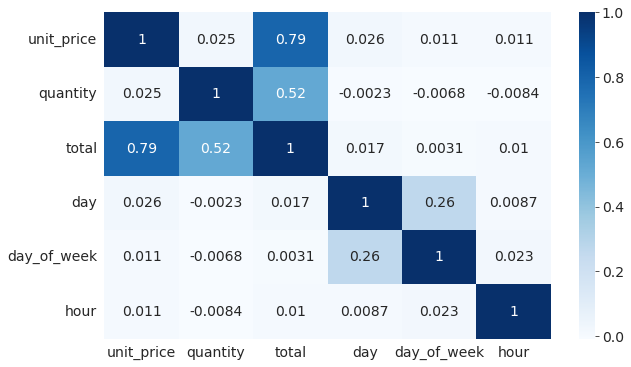

In [31]:
sns.heatmap(data=sales_df.corr(),
            cmap='Blues',
            annot=True);

Total has a strong correlation with unit price and quantity, we saw this in the above section, where total is postively skewed due to the unit price and quanity influence.

Rest of the columns are close to 0, which are not strongly correlated.